# Regression

## 1 - Linear Regression with Sklearn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/houses.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
livecode_data = data[['GrLivArea','SalePrice']]

livecode_data.head()

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


### Exploring

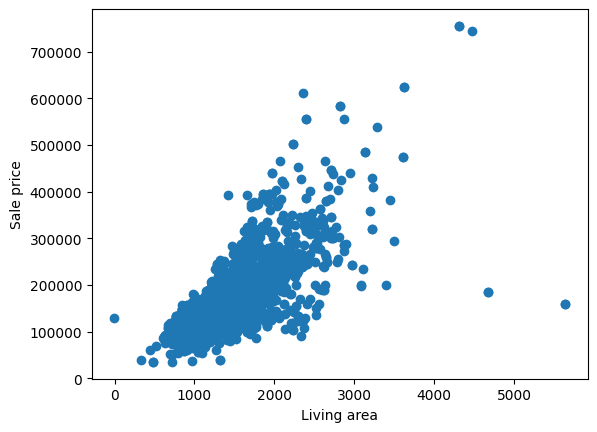

In [4]:
import matplotlib.pyplot as plt

# Plot Living area vs Sale price
plt.scatter(data['GrLivArea'], data['SalePrice'])

# Labels
plt.xlabel("Living area")
plt.ylabel("Sale price")

plt.show()

### Training

In [5]:
# Import the model
from sklearn.linear_model import LinearRegression

# Instanciate the model
model = LinearRegression()

# Define X and y
X = data[['GrLivArea']]
y = data['SalePrice']

# Train the model on the data
model.fit(X, y)

LinearRegression()

### Model Attributes

In [6]:
# View the model's slope (a)
model.coef_

array([105.00927564])

In [7]:
# View the model's intercept (b)
model.intercept_

np.float64(22104.12101002084)

### Scoring

In [8]:
# Evaluate the model's performance
model.score(X,y)

0.48960426399689116

### Predicting

In [9]:
#  Predict on new data
model.predict([[1000]])

/Users/gabrielasoares/repositorios/Lusofona/2025-2026-1/icd/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([127113.39664561])

# Generalization

### Splitting - The Holdout Method

In [10]:
from sklearn.model_selection import train_test_split

# split the data into train and test
train_data, test_data = train_test_split(livecode_data, test_size=0.3)

# Ready Xs and ys
X_train = train_data[['GrLivArea']]
y_train = train_data['SalePrice']

X_test = test_data[['GrLivArea']]
y_test = test_data['SalePrice']

In [11]:
# Ready X and y
X = livecode_data[['GrLivArea']]
y = livecode_data['SalePrice']

# Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [12]:
X_train

,GrLivArea
1473,1911
847,864
331,1056
1536,1056
964,1894
...,...
1484,1564
1409,2093
1600,1120
894,1535


In [13]:
X_test

,GrLivArea
966,1308
347,1478
1087,1953
1397,1513
285,1250
...,...
887,1393
1016,1504
1736,1405
724,1698


### Training and Scoring

In [14]:
# Instanciate the model
model = LinearRegression()

# Train the model on the Training data
model.fit(X_train, y_train)

# Score the model on the Testing data
model.score(X_test,y_test)

#  Predict on new data
model.predict([[1000]])


/Users/gabrielasoares/repositorios/Lusofona/2025-2026-1/icd/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([126732.06581766])

### Random values generate different results each time

In [15]:
### RUN THIS CELL MULTIPLE TIMES TO SEE DIFFERENT SCORES

# Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42)

# Instanciate the model
model = LinearRegression()

# Train the model on the Training data
model.fit(X_train, y_train)

# Score the model on the Testing data
model.score(X_test,y_test)

0.45045362532113353

# Cross Validation

In [16]:
from sklearn.model_selection import cross_validate

In [17]:
# Instanciate model
model = LinearRegression()

# 5-Fold Cross validate model
cv_results = cross_validate(model, X, y, cv=5)

cv_results

{'fit_time': array([0.00446796, 0.00175476, 0.00116611, 0.00107574, 0.00138402]),
 'score_time': array([0.000875  , 0.00083828, 0.00094008, 0.00062704, 0.00083113]),
 'test_score': array([0.55810657, 0.52593307, 0.50430916, 0.3911751 , 0.45203221])}

In [18]:
cv_results["test_score"]



array([0.55810657, 0.52593307, 0.50430916, 0.3911751 , 0.45203221])

In [19]:
cv_results["test_score"].mean()

np.float64(0.4863112208425962)

# Learning Curves with Sklearn

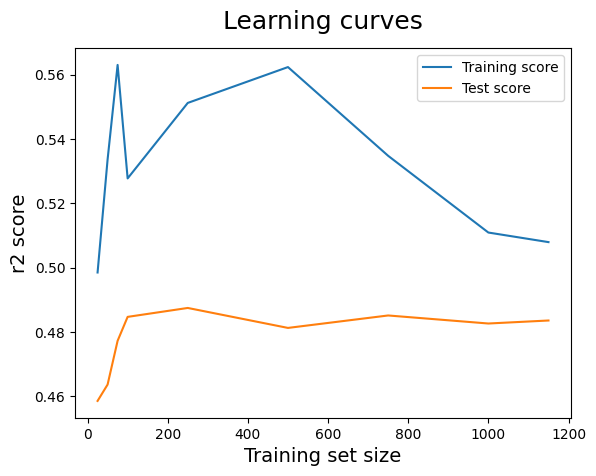

In [20]:
import numpy as np
from sklearn.model_selection import learning_curve

train_sizes = [25,50,75,100,250,500,750,1000,1150]
# Get train scores (R2), train sizes, and validation scores using `learning_curve`
train_sizes, train_scores, test_scores = learning_curve(
    estimator=LinearRegression(), X=X, y=y, train_sizes=train_sizes, cv=5)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()

In [21]:
train_sizes

array([  25,   50,   75,  100,  250,  500,  750, 1000, 1150])

In [22]:
train_scores

array([[0.51071405, 0.49543383, 0.49543383, 0.49543383, 0.49543383],
       [0.59021136, 0.51944749, 0.51944749, 0.51944749, 0.51944749],
       [0.59537432, 0.55488807, 0.55488807, 0.55488807, 0.55488807],
       [0.5766314 , 0.51549801, 0.51549801, 0.51549801, 0.51549801],
       [0.51385625, 0.56050713, 0.56050713, 0.56050713, 0.56050713],
       [0.54769543, 0.56495786, 0.56630712, 0.56630712, 0.56630712],
       [0.51700005, 0.52848837, 0.54064102, 0.54379074, 0.54379074],
       [0.48457224, 0.491672  , 0.50236489, 0.53795744, 0.53795744],
       [0.48361962, 0.48957915, 0.49914166, 0.53303556, 0.53427557]])

In [23]:
test_scores

array([[0.50576369, 0.50153463, 0.46593325, 0.37913032, 0.44057681],
       [0.52575732, 0.52451774, 0.48191191, 0.35250443, 0.4336587 ],
       [0.55311867, 0.53262997, 0.49577621, 0.36493817, 0.43989393],
       [0.53525237, 0.53076047, 0.50559647, 0.39894464, 0.45294987],
       [0.56122721, 0.53453633, 0.50792623, 0.38652727, 0.44714895],
       [0.55670439, 0.53677235, 0.50644535, 0.36812148, 0.4383105 ],
       [0.56132103, 0.53394973, 0.50727362, 0.37861064, 0.44453992],
       [0.55941156, 0.52708568, 0.50558957, 0.37742765, 0.44368783],
       [0.55961001, 0.52786155, 0.50595894, 0.37894515, 0.44549517]])

In [24]:
test_scores_mean

array([0.45858774, 0.46367002, 0.47727139, 0.48470077, 0.4874732 ,
       0.48127082, 0.48513899, 0.48264046, 0.48357416])

## Now, it is your turn!!

Now, you will work with the Boston housing dataset (boston_house_prices.csv), which is maintained at Carnegie Mellon University. This data is derived from information collected by the U.S. Census Service on Housing in the Boston MA Area. Below you find the description of the columns of the dataset:

Boston house prices dataset dictionary
---------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 506

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

    :Missing Attribute Values: None

In [ ]:
#Imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model, metrics

# load the boston dataset


# check what the boston dataset contains


# Store the boston characteristics in an `boston_df` DataFrame, with their names


#it's missing MEDV
#add MEDV



#check if it's been added correctly



In [ ]:
# Check for missing values as the model does not drive with missing values


In [ ]:
# Explore the correlation between variables. For example, plot LSTAT vs MEDV and RM vs MEDV. Interpret the visualizations.

In [ ]:
# defining feature matrix(X) and response vector(y) and check the shape



In [ ]:
# Preparing the data for training the model
#splitting X and y into training and testing sets


# create linear regression object


# train the model using the training sets


# regression coefficients


# variance score: 1 means perfect prediction





In [ ]:
# model evaluation



In [ ]:
#Predict with the test dataset or with new input

